In [2]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 

In [3]:
from roboflow import Roboflow

API_KEY = "wISfBdFb6zbD1MgD49SI"
WORKSPACE = "b-8pp1v"

rf = Roboflow(api_key=API_KEY)

pan = rf.workspace(WORKSPACE).project("pan-twznp-xudzz").version(1).download("yolov8")
passport = rf.workspace(WORKSPACE).project("passport-btyua-20czk").version(1).download("yolov8")
dl = rf.workspace(WORKSPACE).project("driving-license-annotation-qmxd3").version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PAN-1 in yolov8:: 100%|██████████| 132/132 [00:00<00:00, 1148.39it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to passport-1 in yolov8:: 100%|██████████| 62/62 [00:00<00:00, 8606.26it/s]

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Driving-License-Annotation-1 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 7253.57it/s]


In [4]:
import os
from glob import glob
import shutil

# Set the source directories and their new class indices
sources = [
    ('Driving-License-Annotation-1', 2),  # class 2: driving license
    ('PAN-1', 0),                        # class 0: pan
    ('passport-1', 1)                    # class 1: passport
]

MERGED = "merged_dataset"
splits = ['train', 'valid']

for split in splits:
    os.makedirs(f"{MERGED}/{split}/images", exist_ok=True)
    os.makedirs(f"{MERGED}/{split}/labels", exist_ok=True)

for src_folder, new_class_id in sources:
    for split in splits:
        img_dir = f"{src_folder}/{split}/images"
        lbl_dir = f"{src_folder}/{split}/labels"
        for img_path in glob(f"{img_dir}/*.jpg"):
            base = f"{src_folder.replace('-','_').lower()}_{os.path.basename(img_path)}"
            # Copy image
            shutil.copy(img_path, f"{MERGED}/{split}/images/{base}")
            # Copy and rewrite label
            lbl_path = os.path.join(lbl_dir, os.path.basename(img_path).replace('.jpg','.txt'))
            if os.path.exists(lbl_path):
                with open(lbl_path) as fin, open(f"{MERGED}/{split}/labels/{base.replace('.jpg','.txt')}",'w') as fout:
                    for line in fin:
                        parts = line.strip().split()
                        new_line = [str(new_class_id)] + parts[1:]
                        fout.write(" ".join(new_line) + "\n")

In [5]:
yaml_content = f"""
train: merged_dataset/train/images
val: merged_dataset/valid/images

nc: 3
names: ['pan', 'passport', 'driving_license']
"""
with open("merged_dataset/data.yaml", "w") as f:
    f.write(yaml_content)

In [6]:
for split in splits:
    print(f"{split} images:", len(os.listdir(f"{MERGED}/{split}/images")))
    print(f"{split} labels:", len(os.listdir(f"{MERGED}/{split}/labels")))

with open("merged_dataset/data.yaml") as f:
    print(f.read())

train images: 229
train labels: 229
valid images: 24
valid labels: 24

train: merged_dataset/train/images
val: merged_dataset/valid/images

nc: 3
names: ['pan', 'passport', 'driving_license']



In [7]:
import os
os.chdir('/content')  # or wherever merged_dataset is located!

In [8]:
!ls /content/merged_dataset/train/images | head  # should show image files
!ls /content/merged_dataset/valid/images | head  # should show image files

driving_license_annotation_1_Indiana_dl_002_png.rf.674fff419b7c1e34001e313407652e00.jpg
driving_license_annotation_1_Indiana_dl_003_png.rf.debd4c33d5122829707a9c6976519fc4.jpg
driving_license_annotation_1_Indiana_dl_004_png.rf.d755eeacc0e505f40d5e883bb73441b5.jpg
driving_license_annotation_1_Indiana_dl_006_png.rf.964ca0d59898e2894f2c913586bb911d.jpg
driving_license_annotation_1_Indiana_dl_007_png.rf.a0f1e069bfa04949a1866184dedb386e.jpg
driving_license_annotation_1_Indiana_dl_008_png.rf.26ce8da53bcce406855880625afeb2a8.jpg
driving_license_annotation_1_Indiana_dl_009_png.rf.7f534dd7af307cb645868987d9c7a9de.jpg
driving_license_annotation_1_Indiana_dl_010_png.rf.c3ca688dd0d9f0dcab0625f0fd9a493c.jpg
driving_license_annotation_1_Indiana_dl_013_png.rf.de676446d21f579d1c1884a9c43f102d.jpg
driving_license_annotation_1_Indiana_dl_015_png.rf.1ac22423ca3f4ae70837b5845b878a28.jpg
driving_license_annotation_1_Indiana_dl_012_png.rf.e2cca335a4457c5ebf5befef6a7b74f5.jpg
driving_license_annotation_1_Ind

In [9]:
import os
print("Current working dir:", os.getcwd())
print("Train images exist:", os.path.exists("merged_dataset/train/images"))
print("Valid images exist:", os.path.exists("merged_dataset/valid/images"))

Current working dir: /content
Train images exist: True
Valid images exist: True


In [10]:
import os
print("Current working directory:", os.getcwd())
print("Should exist:", os.path.exists("/content/merged_dataset/valid/images"))
print("Should NOT exist:", os.path.exists("/content/merged_dataset/merged_dataset/valid/images"))

Current working directory: /content
Should exist: True
Should NOT exist: False


In [11]:
!echo "train: /content/merged_dataset/train/images\nval: /content/merged_dataset/valid/images\nnc: 3\nnames: ['pan', 'passport', 'driving_license']" > /content/merged_dataset/data.yaml

In [12]:
with open("/content/merged_dataset/data.yaml", "w") as f:
    f.write(
"""train: /content/merged_dataset/train/images
val: /content/merged_dataset/valid/images

nc: 3
names: ['pan', 'passport', 'driving_license']
""")

In [13]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/merged_dataset/data.yaml epochs=100 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 127MB/s]
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/merged_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers

In [17]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

# Path to your trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# List of your class names (MUST match the order in your data.yaml)
class_names = ['PAN', 'Passport', 'driving_license']

# Path to your test image
test_img = '/content/panb.jpg'  # change this!

results = model(test_img)
img = Image.open(test_img)

found = False  # Track if any detection was found

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    cropped = img.crop((x1, y1, x2, y2))
    print(f"✅ Detected profile photo type: {class_names[class_id]}")
    display(cropped)
    found = True

if not found:
    print("❌ No profile photo detected in this image.")


image 1/1 /content/panb.jpg: 640x384 (no detections), 7.5ms
Speed: 2.1ms preprocess, 7.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
❌ No profile photo detected in this image.


In [18]:
from PIL import Image
img = Image.open('/content/panb.jpg')
img.show()

In [19]:
results = model('/content/panb.jpg', conf=0.15)  # try a lower conf


image 1/1 /content/panb.jpg: 640x384 (no detections), 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)


In [20]:
print(results[0].boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (1599, 899)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))



image 1/1 /content/PAN-1/train/images/D10_jpg.rf.684f898640ff94a38c9a9f2d8835d37c.jpg: 416x640 3 pans, 39.9ms
Speed: 2.1ms preprocess, 39.9ms inference, 125.7ms postprocess per image at shape (1, 3, 416, 640)
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.8945, 0.8485, 0.8143], device='cuda:0')
data: tensor([[ 17.7463, 197.2412, 152.5245, 227.6530,   0.8945,   0.0000],
        [ 21.5048, 157.7236, 117.1089, 178.4529,   0.8485,   0.0000],
        [ 18.3427,  73.2643, 171.4704, 101.4433,   0.8143,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (297, 484)
shape: torch.Size([3, 6])
xywh: tensor([[ 85.1354, 212.4471, 134.7782,  30.4118],
        [ 69.3068, 168.0883,  95.6041,  20.7293],
        [ 94.9066,  87.3538, 153.1278,  28.1790]], device='cuda:0')
xywhn: tensor([[0.1759, 0.7153, 0.2785, 0.1024],
        [0.1432, 0.5660, 0.1975, 0.0698],
        [0.1961, 0.2941, 0.3164, 0.0949]], device='cu

✅ Detected profile photo type: PAN


✅ Detected profile photo type: PAN


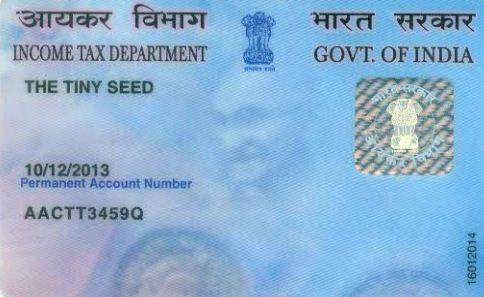

In [27]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

model = YOLO('/content/runs/detect/train/weights/best.pt')
class_names = ['PAN', 'Passport', 'driving_license']

img_path = '/content/PAN-1/train/images/D10_jpg.rf.684f898640ff94a38c9a9f2d8835d37c.jpg'
img = Image.open(img_path)
results = model(img_path, conf=0.15)  # lower threshold

print("Boxes:", results[0].boxes)
found = False
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    cropped = img.crop((x1, y1, x2, y2))
    print(f"✅ Detected profile photo type: {class_names[class_id]}")
    display(cropped)
    found = True

if not found:
    print("❌ No profile photo detected in this image.")

# Always show input for comparison
display(img)


image 1/1 /content/Driving-License-Annotation-1/train/images/Indiana_dl_002_png.rf.674fff419b7c1e34001e313407652e00.jpg: 384x640 8 driving_licenses, 40.1ms
Speed: 1.8ms preprocess, 40.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 2., 2., 2., 2., 2., 2., 2.], device='cuda:0')
conf: tensor([0.9447, 0.8816, 0.8098, 0.7081, 0.6163, 0.5458, 0.4578, 0.3304], device='cuda:0')
data: tensor([[6.4743e+00, 6.8370e+01, 1.7335e+02, 2.7604e+02, 9.4468e-01, 2.0000e+00],
        [1.7224e+02, 2.6267e+02, 3.3014e+02, 2.8904e+02, 8.8163e-01, 2.0000e+00],
        [1.7580e+02, 1.1552e+02, 2.6136e+02, 1.3680e+02, 8.0980e-01, 2.0000e+00],
        [4.3596e+02, 6.5116e+01, 5.7829e+02, 9.4080e+01, 7.0811e-01, 2.0000e+00],
        [1.7455e+02, 9.6527e+01, 2.5114e+02, 1.1750e+02, 6.1632e-01, 2.0000e+00],
        [1.7759e+02, 1.3965e+02, 5.0478e+02, 1.6729e+02, 5.4580e-01, 2.0000e+00],
        [1.7201e+02, 6.3

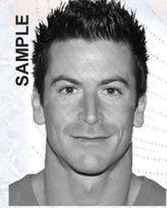

✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


✅ Detected profile photo type: driving_license


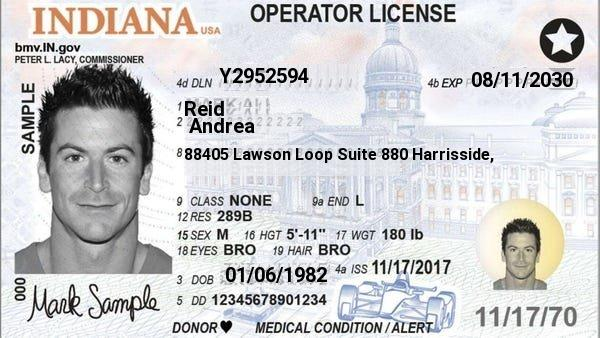

In [28]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

model = YOLO('/content/runs/detect/train/weights/best.pt')
class_names = ['PAN', 'Passport', 'driving_license']

img_path = '/content/Driving-License-Annotation-1/train/images/Indiana_dl_002_png.rf.674fff419b7c1e34001e313407652e00.jpg'
img = Image.open(img_path)
results = model(img_path, conf=0.15)  # lower threshold

print("Boxes:", results[0].boxes)
found = False
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    cropped = img.crop((x1, y1, x2, y2))
    print(f"✅ Detected profile photo type: {class_names[class_id]}")
    display(cropped)
    found = True

if not found:
    print("❌ No profile photo detected in this image.")

# Always show input for comparison
display(img)


image 1/1 /content/passport-1/train/images/10_jpg.rf.60267650f4236de8ab6b2c1759f6f886.jpg: 448x640 7 passports, 39.1ms
Speed: 8.6ms preprocess, 39.1ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1., 1., 1., 1.], device='cuda:0')
conf: tensor([0.9325, 0.8926, 0.8874, 0.8826, 0.8787, 0.8677, 0.8418], device='cuda:0')
data: tensor([[ 46.4788,  47.1831, 142.2516, 166.3037,   0.9325,   1.0000],
        [198.4109, 201.9067, 288.7636, 219.2899,   0.8926,   1.0000],
        [325.4589, 202.0006, 417.3196, 219.1673,   0.8874,   1.0000],
        [158.0510,  92.4874, 216.3057, 107.1096,   0.8826,   1.0000],
        [331.9414,  46.5058, 426.1655,  63.2439,   0.8787,   1.0000],
        [157.4214,  68.0258, 209.7991,  80.5816,   0.8677,   1.0000],
        [172.4413, 117.7219, 219.4247, 133.0947,   0.8418,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (290, 444)
shape: to

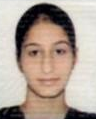

✅ Detected profile photo type: Passport


✅ Detected profile photo type: Passport


✅ Detected profile photo type: Passport


✅ Detected profile photo type: Passport


✅ Detected profile photo type: Passport


✅ Detected profile photo type: Passport


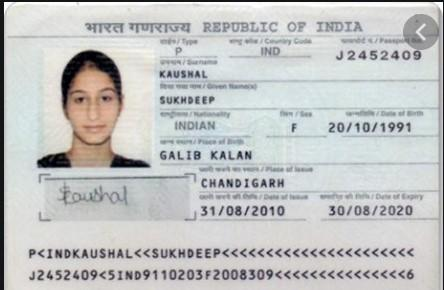

In [29]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

model = YOLO('/content/runs/detect/train/weights/best.pt')
class_names = ['PAN', 'Passport', 'driving_license']

img_path = '/content/passport-1/train/images/10_jpg.rf.60267650f4236de8ab6b2c1759f6f886.jpg'
img = Image.open(img_path)
results = model(img_path, conf=0.15)  # lower threshold

print("Boxes:", results[0].boxes)
found = False
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    cropped = img.crop((x1, y1, x2, y2))
    print(f"✅ Detected profile photo type: {class_names[class_id]}")
    display(cropped)
    found = True

if not found:
    print("❌ No profile photo detected in this image.")

# Always show input for comparison
display(img)


image 1/1 /content/PAN-1/train/images/D18_jpg.rf.7c304beee7bf095b712b22563ae963a5.jpg: 416x640 3 pans, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)
Boxes: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.8688, 0.8642, 0.8060], device='cuda:0')
data: tensor([[1.6910e+01, 1.3636e+03, 7.9495e+02, 1.5065e+03, 8.6882e-01, 0.0000e+00],
        [1.0075e+01, 8.8991e+02, 6.3956e+02, 1.0225e+03, 8.6416e-01, 0.0000e+00],
        [1.0429e+01, 4.0497e+02, 1.6655e+03, 6.2568e+02, 8.0598e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1597, 2587)
shape: torch.Size([3, 6])
xywh: tensor([[ 405.9304, 1435.0098,  778.0413,  142.9153],
        [ 324.8175,  956.2303,  629.4852,  132.6323],
        [ 837.9575,  515.3233, 1655.0579,  220.7123]], device='cuda:0')
xywhn: tensor([[0.1569, 0.8986, 0.3008, 0.0895],
        [0.1256, 0.5988, 0.2433, 0.0831],
       

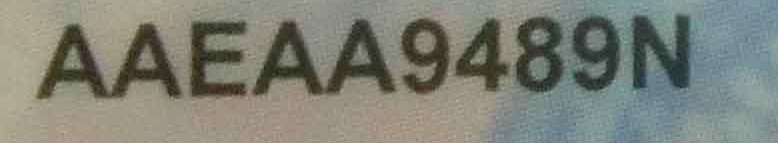

✅ Detected profile photo type: PAN


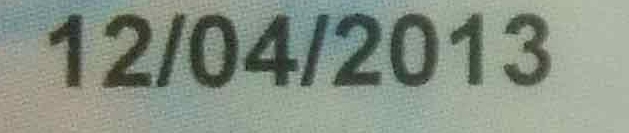

✅ Detected profile photo type: PAN


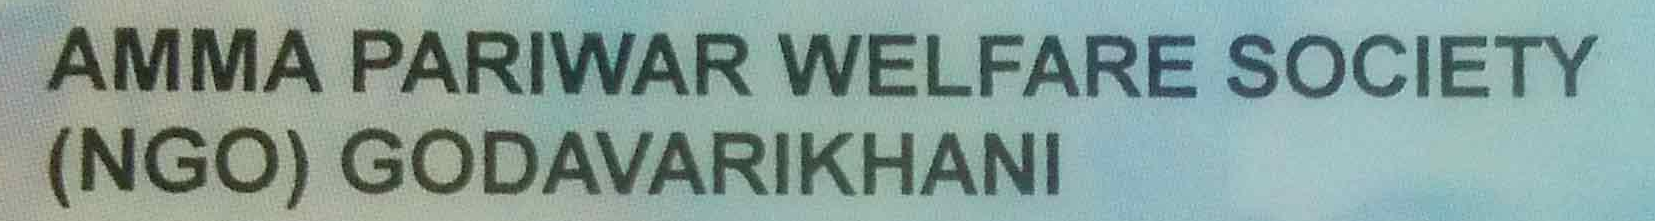

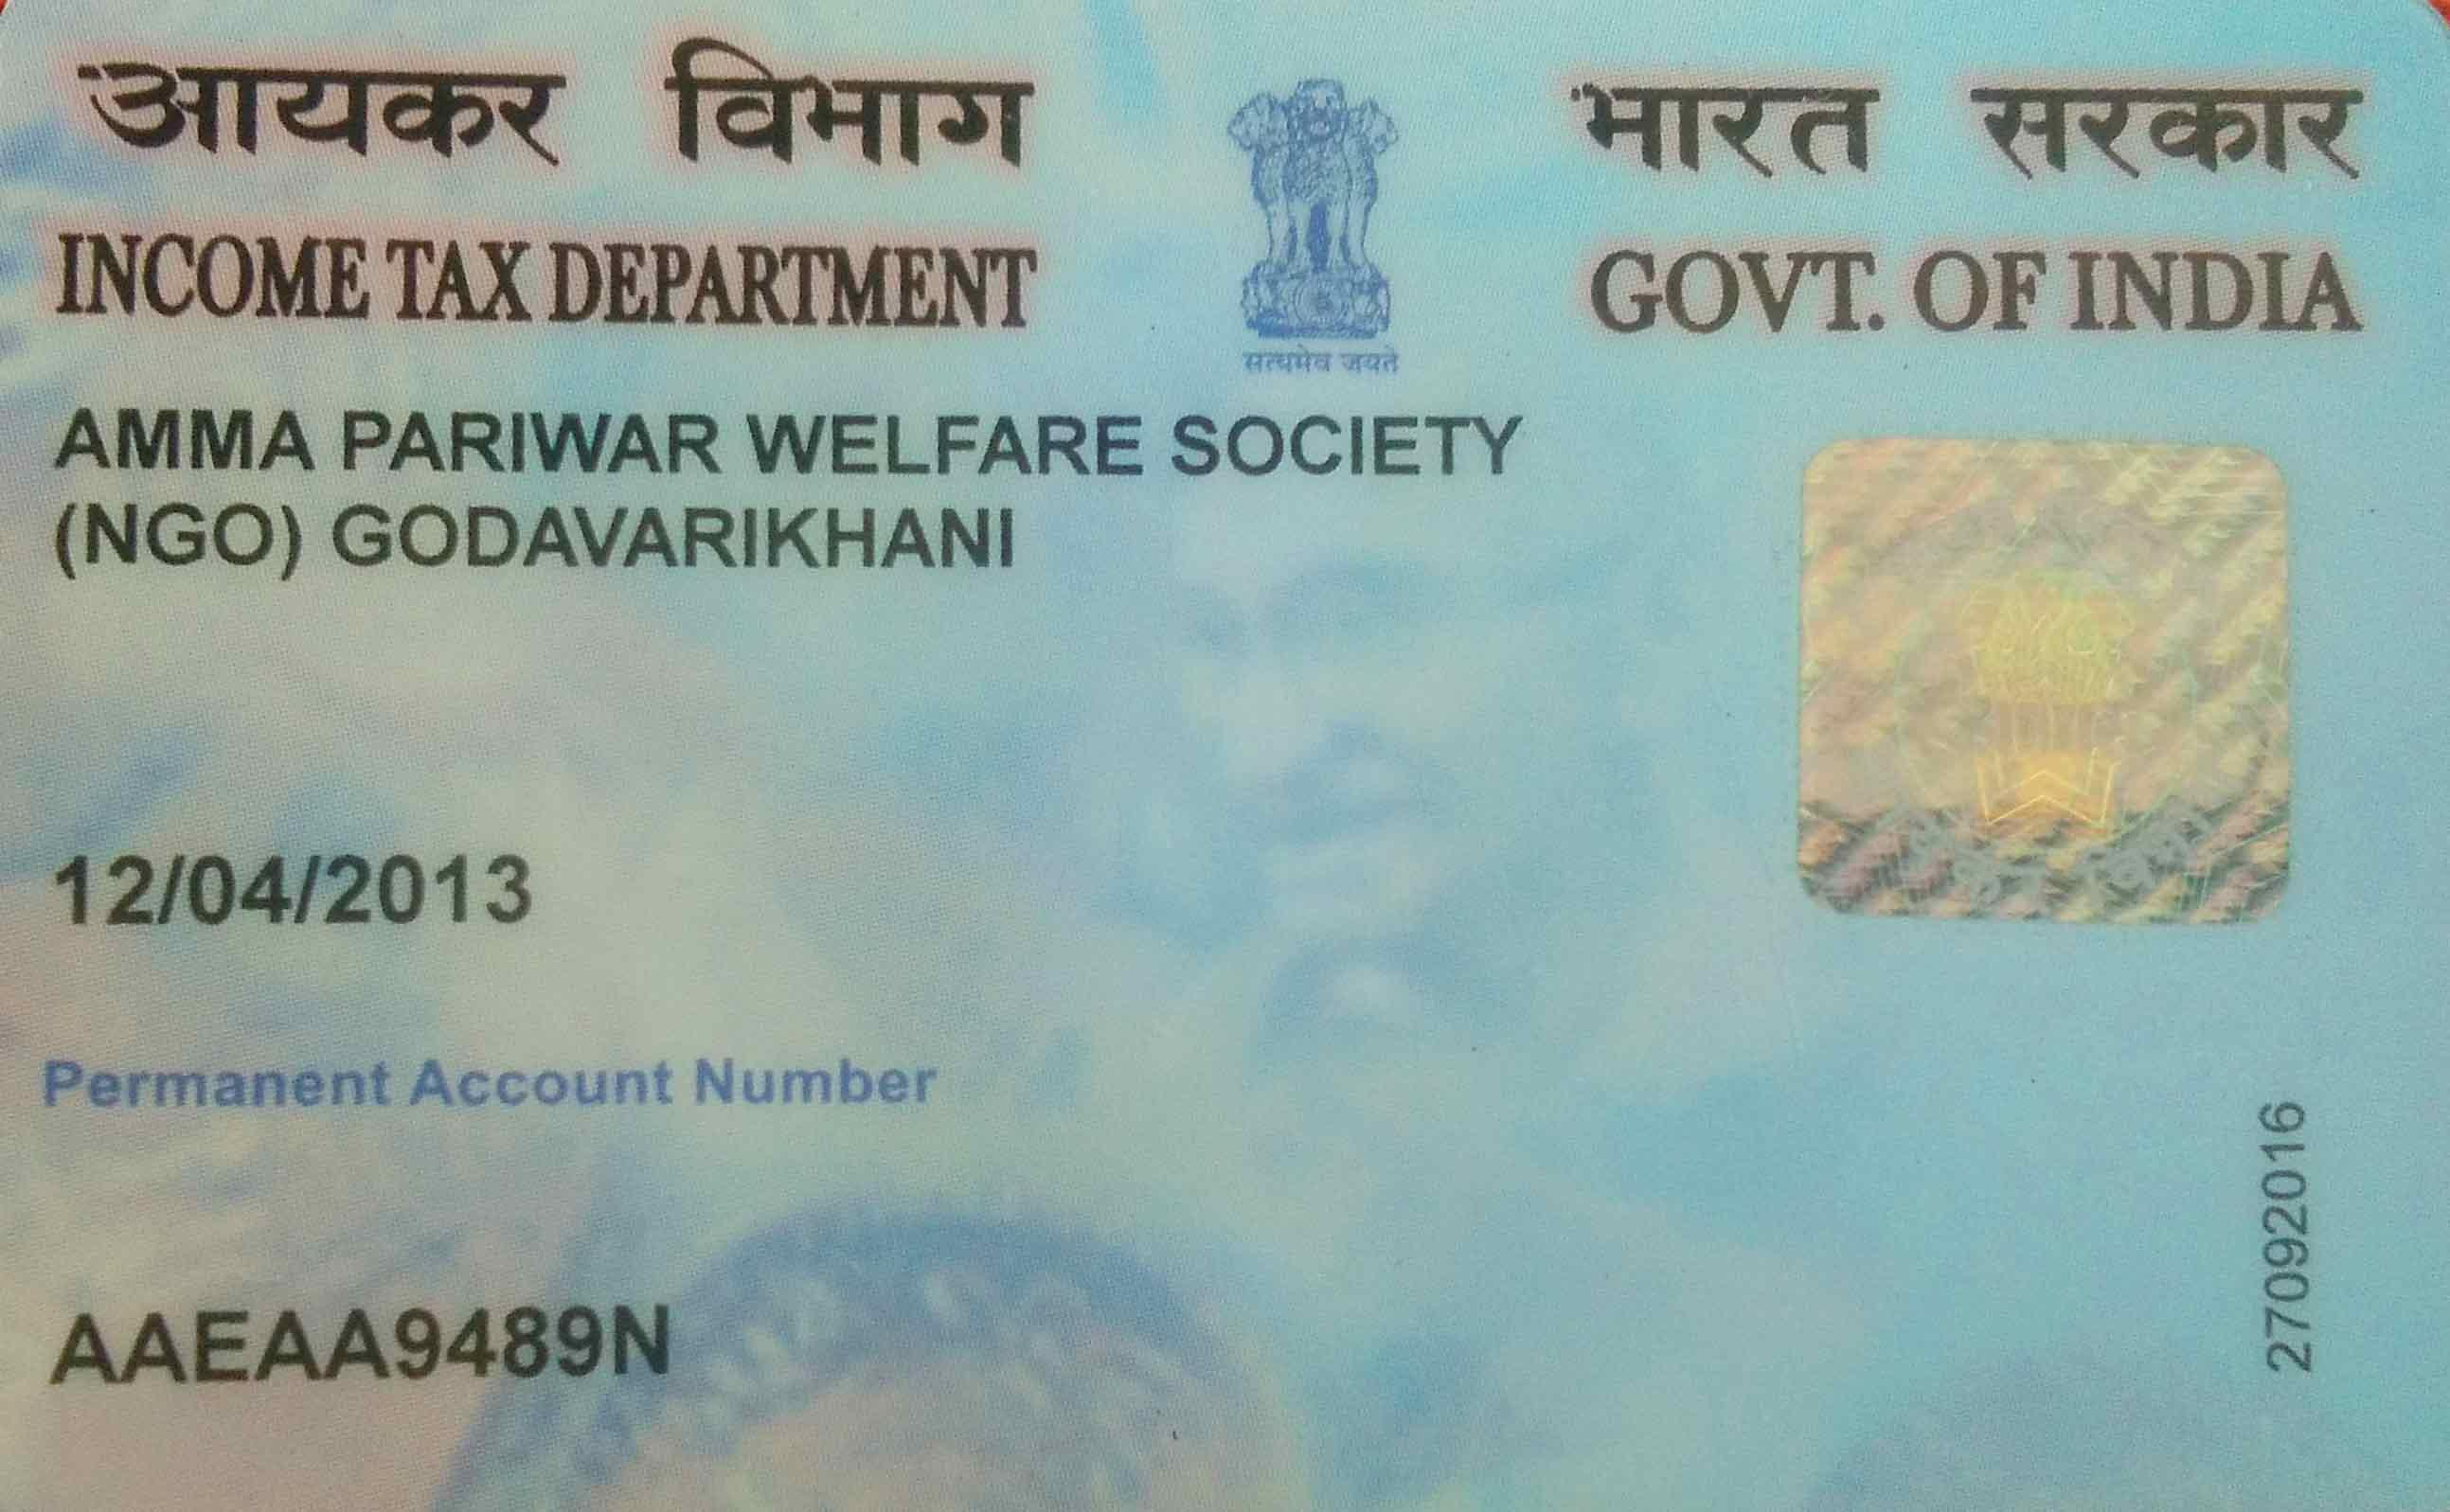

In [33]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

model = YOLO('/content/runs/detect/train/weights/best.pt')
class_names = ['PAN', 'Passport', 'driving_license']

img_path = '/content/PAN-1/train/images/D18_jpg.rf.7c304beee7bf095b712b22563ae963a5.jpg'
img = Image.open(img_path)
results = model(img_path, conf=0.15)  # lower threshold

print("Boxes:", results[0].boxes)
found = False
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_id = int(box.cls[0])
    cropped = img.crop((x1, y1, x2, y2))
    print(f"✅ Detected profile photo type: {class_names[class_id]}")
    display(cropped)
    found = True

if not found:
    print("❌ No profile photo detected in this image.")

# Always show input for comparison
display(img)